In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
# fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [4]:
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/{problem_name}_surface_and_contour-autumn.png'
# )

n_gpus: 0
cpu


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem spe

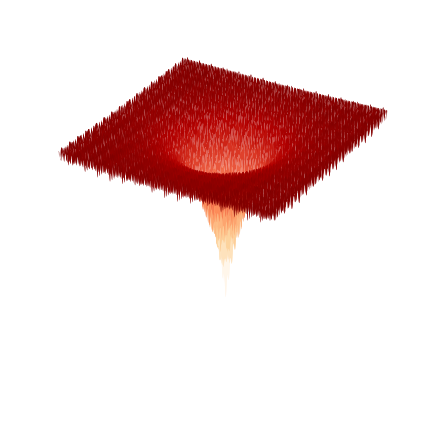

In [23]:
# Run all problems
problem_names = [
    'ackley',
    # 'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    # 'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
    # 'ex8_1_1',
    # # 'ex8_6_2',  # Need to fix threw an error
    # 'kriging_peaks_red010',
    # 'kriging_peaks_red020',
    # 'kriging_peaks_red030',
    # 'kriging_peaks_red050',
    # 'kriging_peaks_red100',
    # 'kriging_peaks_red200',
    # 'kriging_peaks_red500',
    # 'mathopt6',
    # 'quantum',
    # 'rosenbrock',
]

problem_performance = []
trials = 1

for problem_name in problem_names:
    problem = PROBLEMS_BY_NAME[problem_name]
    outputs = run_deeplifting(problem, trials=trials)
    results = outputs['final_results']

    # get the global minimum and the number of hits
    minimum_value = problem['global_minimum']
    hit = np.array([np.abs(found_min - minimum_value) for _, _, found_min in results])
    hits = np.where(hit <= 1e-4, 1, 0).mean()

    # Create a performance dataframe
    df = pl.DataFrame(
        {
            'problem_name': [problem_name] * trials,
            'algorithm': ['deeplifting'] * trials,
            'hits': hits,
        }
    )
    problem_performance.append(df)

    # Let's plot the values with UMN colors
    fig = create_optimization_plot(
        problem_name, problem, results, add_contour_plot=False, colormap='OrRd'
    )

In [27]:
fig.subplots_adjust(left=0, right=2, bottom=0, top=2)
fig.savefig(
    '/Users/ryandevera/data-science/umn_environments/Deeplifting'
    f'/images/ackley_introduction.png',
    bbox_inches='tight',
    pad_inches=-0.1,
)

In [ ]:
performance_df = pl.concat(problem_performance, how='vertical')

In [ ]:
performance_df = (
    performance_df.groupby(['problem_name'])
    .agg(pl.col('hits').mean())
    .rename({'hits': 'success_rate'})
    .sort('problem_name')
)

In [ ]:
performance_df